In [1]:
%run lattice_gen.py

single layer Hamiltonian done
4 layer Hamiltonian done
fractal done
wavepacket done


In [2]:
Lx = 40
Ly = 10
t = np.ones((Ly, Lx))
m_vals = np.ones((Ly, Lx))
gamma = 0.02 * np.ones((Ly, Lx))
T = 0
Ts = 0.5
To = 0.5
H_all = H_four_layer_Lx_Ly_all(Lx, Ly, t, m_vals, gamma, T, Ts, To)

In [3]:
sparse_memory = (H_all.data.nbytes + H_all.indptr.nbytes + H_all.indices.nbytes) / 1e9
print(f"Memory usage of sparse matrix: {sparse_memory:.6f} GB")

Memory usage of sparse matrix: 0.000304 GB


In [4]:
H_dense = H_all.todense()
H_dense_np = np.array(H_dense)
H_tensor = torch.tensor(H_dense_np, dtype=torch.complex128)

H_dense_memory = H_dense_np.data.nbytes / 1e9
print(f"Memory usage of dense matrix: {H_dense_memory:.6f} GB")
H_tensor_memory = H_tensor.data.element_size() * H_tensor.numel() / 1e9
print(f"Memory usage of dense tensor: {H_tensor_memory:.6f} GB")

Memory usage of dense matrix: 0.081920 GB
Memory usage of dense tensor: 0.163840 GB


In [5]:
# Compute the eigenvalues
E, V = torch.linalg.eig(H_tensor)

In [6]:
print(len(E))
print(len(V))
print(8*Lx*Ly)

3200
3200
3200


In [7]:
sorted_indices_re = np.argsort(np.real(E))
E_sort_re = E[sorted_indices_re]
V_sort_re = V[:, sorted_indices_re]

IPR_values_copy1= []
IPR_values_copy2= []

for n0 in range(len(E_sort_re)):
    V1 = np.zeros((Lx * Ly, 1), dtype=complex)
    V2 = np.zeros((Lx * Ly, 1), dtype=complex)
    V3 = np.zeros((Lx * Ly, 1), dtype=complex)
    V4 = np.zeros((Lx * Ly, 1), dtype=complex)


    for i in range(Lx * Ly):
        V1[i, 0] = abs(V_sort_re[2 * i, n0] ** 2) + abs(V_sort_re[2 * i + 1, n0] ** 2)
        V2[i, 0] = abs(V_sort_re[2 * i + 2 * Lx * Ly, n0] ** 2) + abs(V_sort_re[2 * i + 1 + 2 * Lx * Ly, n0] ** 2)
        V3[i, 0] = abs(V_sort_re[2 * i + 4 * Lx * Ly, n0] ** 2) + abs(V_sort_re[2 * i + 1 + 4 * Lx * Ly, n0] ** 2)
        V4[i, 0] = abs(V_sort_re[2 * i + 6 * Lx * Ly, n0] ** 2) + abs(V_sort_re[2 * i + 1 + 6 * Lx * Ly, n0] ** 2)

    eigenstate_1 = np.reshape(V1, (Ly, Lx))
    eigenstate_2 = np.reshape(V2, (Ly, Lx))
    eigenstate_3 = np.reshape(V3, (Ly, Lx))
    eigenstate_4 = np.reshape(V4, (Ly, Lx))

    IPR12 = abs(np.sum(eigenstate_1[0,:]))/abs(np.sum(eigenstate_1))+abs(np.sum(eigenstate_1[Ly-1,:]))/abs(np.sum(eigenstate_1)) + abs(np.sum(eigenstate_2[0,:]))/abs(np.sum(eigenstate_2))+abs(np.sum(eigenstate_2[Ly-1,:]))/abs(np.sum(eigenstate_2))

    IPR34 = abs(np.sum(eigenstate_3[0,:]))/abs(np.sum(eigenstate_3))+abs(np.sum(eigenstate_3[Ly-1,:]))/abs(np.sum(eigenstate_3)) + abs(np.sum(eigenstate_4[0,:]))/abs(np.sum(eigenstate_4))+abs(np.sum(eigenstate_4[Ly-1,:]))/abs(np.sum(eigenstate_4))

    IPR_values_copy1.append(IPR12)
    IPR_values_copy2.append(IPR34)

# Convert IPR values to colors
colors_copy1 = np.array(IPR_values_copy1)
colors_copy2 = np.array(IPR_values_copy2)

colors = (colors_copy1 + colors_copy2) / 4


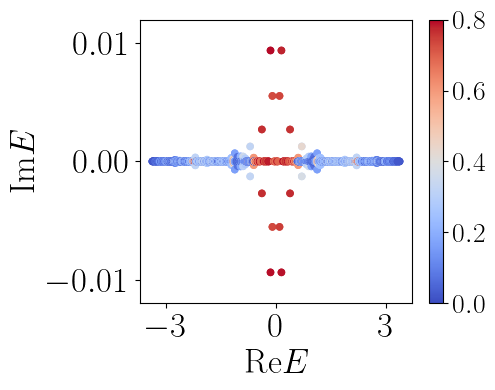

In [ ]:
# Create the scatter plot
plt.figure(figsize=(5,4))
# Create the scatter plot
scatter = plt.scatter(np.real(E_sort_re), np.imag(E_sort_re), s=20, c=colors, cmap='coolwarm', vmin=0, vmax=0.8)
colorbar = plt.colorbar(scatter)
### label colorbar ticks 0, 0.5, 1
# colorbar.set_ticks([0.6, 0.8])
### label colorbar ticks as bulk and topo
# colorbar.set_ticklabels(['Bulk', 'Edge'])
# colorbar.ax.set_ylabel(r'$\rho_{\text{Edge}}$', rotation=0, fontsize=22, y=1.0)
colorbar.ax.tick_params(labelsize=20)
plt.xlabel(r'Re$E$', fontsize=25)
plt.ylabel(r'Im$E$', fontsize=25)
# plt.title(rf'$L_x={Lx},\mu_s={np.round(T,2)}$', fontsize=25)

plt.xticks([-3,0,3], fontsize=25)
plt.yticks([-0.01,0,0.01], fontsize=25)
plt.ylim(-0.012, 0.012)
plt.tight_layout()
plt.savefig(f'stackedQSHc4.png', dpi=300)
plt.show()